<a href="https://colab.research.google.com/github/bikram33206/Advanced-house-price-prediction/blob/master/Broadband.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Broadband Outage Detection**

#**EDA on Broadband Outage Detection**

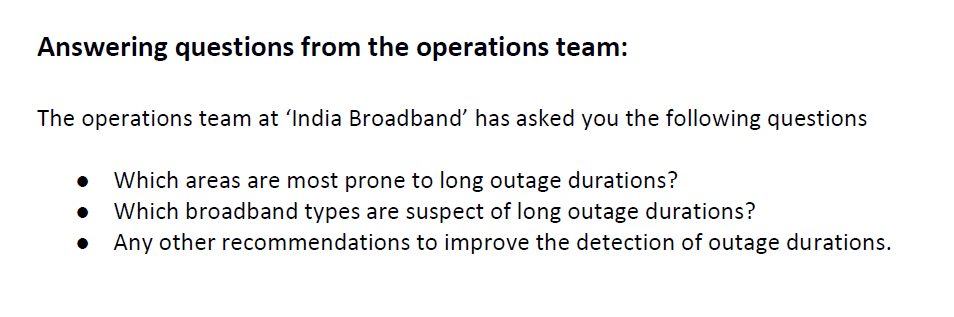

#**Importing Libraries**

In [1]:
import pandas as pd


#**Reading Dataset**

In [2]:
train_data=pd.read_csv('/content/train_data.csv')
train_data.head(2)

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0


In [3]:
broadband_data=pd.read_csv('/content/broadband_data.csv')
broadband_data.head(2)

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8


In [4]:
outage_data=pd.read_csv('/content/outage_data.csv')
outage_data.head(2)

,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2


In [5]:
report_data=pd.read_csv('/content/report_data.csv')
report_data.head(2)

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7


In [6]:
server_data=pd.read_csv('/content/server_data.csv')
server_data.head(2)

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15


#**Joining all CSV file train_data, broadband_data,outage_data, report_data, server_datain one DataFrame**

In [7]:
from functools import reduce
dfs = [train_data,broadband_data,outage_data,report_data,server_data]

In [8]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='id'), dfs)

In [9]:
df_final.head()

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,area_415,1,broadband_type_2,outage_type_4,log_report_type_312,1,transit_server_type_35
1,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_35
2,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_34
3,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_233,1,transit_server_type_35
4,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_233,1,transit_server_type_34


In [10]:
df_final.shape

(48973, 8)

#**Data PreProcessing**

# Checking all unique values in Datafrme

In [11]:
print(df_final.outage_type.unique())
print(len((df_final.outage_type.unique()))) # unique number of Outage _type count

['outage_type_4' 'outage_type_2' 'outage_type_1' 'outage_type_5'
 'outage_type_3']
5


In [12]:
print(df_final.area_code.unique())
print(len(df_final.area_code.unique())) # unique number of Area_code count


['area_415' 'area_474' 'area_931' 'area_700' 'area_600' 'area_645'
 'area_576' 'area_734' 'area_326' 'area_923' 'area_122' 'area_358'
 'area_471' 'area_470' 'area_282' 'area_445' 'area_962' 'area_793'
 'area_846' 'area_468' 'area_476' 'area_737' 'area_467' 'area_1086'
 'area_1015' 'area_945' 'area_619' 'area_373' 'area_485' 'area_625'
 'area_172' 'area_976' 'area_320' 'area_704' 'area_794' 'area_805'
 'area_769' 'area_880' 'area_519' 'area_393' 'area_460' 'area_124'
 'area_1042' 'area_466' 'area_440' 'area_695' 'area_821' 'area_906'
 'area_506' 'area_808' 'area_249' 'area_272' 'area_429' 'area_1010'
 'area_1107' 'area_653' 'area_497' 'area_648' 'area_118' 'area_831'
 'area_1024' 'area_870' 'area_883' 'area_834' 'area_760' 'area_944'
 'area_1018' 'area_527' 'area_7' 'area_803' 'area_187' 'area_380'
 'area_1090' 'area_488' 'area_496' 'area_1084' 'area_995' 'area_627'
 'area_161' 'area_895' 'area_699' 'area_126' 'area_852' 'area_1033'
 'area_465' 'area_268' 'area_1056' 'area_451' 'area_57

In [13]:
print(df_final.outage_duration.unique())
print(len(df_final.outage_duration.unique())) # unique number of Outage_duration count

[1 0 2]
3


In [14]:
print(df_final.broadband_type.unique())
print(len(df_final.broadband_type.unique()))  # unique number of broadband_type count

['broadband_type_2' 'broadband_type_8' 'broadband_type_4'
 'broadband_type_7' 'broadband_type_6' 'broadband_type_1'
 'broadband_type_10' 'broadband_type_3' 'broadband_type_9'
 'broadband_type_5']
10


In [15]:
print(df_final.outage_type.unique())
print(len(df_final.outage_type.unique()))   # unique number of Outage_type count


['outage_type_4' 'outage_type_2' 'outage_type_1' 'outage_type_5'
 'outage_type_3']
5


In [16]:
print(df_final.log_report_type.unique())
print(len(df_final.log_report_type.unique()))  # unique number of log_report_type count


['log_report_type_312' 'log_report_type_233' 'log_report_type_232'
 'log_report_type_315' 'log_report_type_235' 'log_report_type_313'
 'log_report_type_203' 'log_report_type_82' 'log_report_type_80'
 'log_report_type_54' 'log_report_type_284' 'log_report_type_285'
 'log_report_type_84' 'log_report_type_55' 'log_report_type_71'
 'log_report_type_74' 'log_report_type_196' 'log_report_type_195'
 'log_report_type_309' 'log_report_type_307' 'log_report_type_308'
 'log_report_type_219' 'log_report_type_134' 'log_report_type_301'
 'log_report_type_201' 'log_report_type_73' 'log_report_type_227'
 'log_report_type_229' 'log_report_type_234' 'log_report_type_314'
 'log_report_type_42' 'log_report_type_157' 'log_report_type_170'
 'log_report_type_202' 'log_report_type_81' 'log_report_type_171'
 'log_report_type_163' 'log_report_type_47' 'log_report_type_53'
 'log_report_type_191' 'log_report_type_70' 'log_report_type_193'
 'log_report_type_56' 'log_report_type_172' 'log_report_type_94'
 'log_repo

In [17]:
print(df_final.volume.unique())
print(len(df_final.volume.unique()))   # unique number of volume count


[  1   2   3   6  30  14 273 270   8  34   4  21  66  65   5  16  18  23
  25  10  28   7  13  12  69  67  17  40  24 108 104   9  35  29  22  11
  19  20  32  57  15  42 176 168  45  39  41  76 114  83  27  26  37 186
  47  43  36  48 151 132  53  46 156 171  50  38  68  74  89  31  44  85
  88 107 143  55  59  52 100 144  90 413  62  61  33 207 237  58  49 185
 190  63  71  82  96  81  70  79  75  94 120  51  78  60  64  54  93 213
 211 240  72 101  84  56 293  99 164 122  91 111 155 109  86 346 349 263
 212  97 175 148 158 255 258 129 434 105 283 189 118 102 180 166 159 154
 128  87  92 153 323 300 234 170 188  95 647 574 235 334 138 229 265 312
 364 195 149 632 145 119 228 230 127 110  98 335 115 226 131 150 152  73
 167 146 248 179 177 877 662 112 137 187 135 140 126 271 116 103 133 124
 192 125 191 588 450 200 117 139 134 214 233 172  80 121 183 267 113 163
 326 441 203 123 106 206 296 141 451 354 205 202 209 320 157 208 288 636
 301 173  77 162 239 251]
240


In [18]:
print(df_final.transit_server_type.unique())
print(len(df_final.transit_server_type.unique())) # unique number of transit_server_type count

['transit_server_type_35' 'transit_server_type_34'
 'transit_server_type_15' 'transit_server_type_11'
 'transit_server_type_46' 'transit_server_type_47'
 'transit_server_type_20' 'transit_server_type_14'
 'transit_server_type_21' 'transit_server_type_54'
 'transit_server_type_23' 'transit_server_type_13' 'transit_server_type_6'
 'transit_server_type_22' 'transit_server_type_44'
 'transit_server_type_42' 'transit_server_type_43'
 'transit_server_type_18' 'transit_server_type_24'
 'transit_server_type_10' 'transit_server_type_28'
 'transit_server_type_27' 'transit_server_type_30'
 'transit_server_type_29' 'transit_server_type_5' 'transit_server_type_38'
 'transit_server_type_36' 'transit_server_type_45'
 'transit_server_type_40' 'transit_server_type_37'
 'transit_server_type_31' 'transit_server_type_32'
 'transit_server_type_50' 'transit_server_type_26' 'transit_server_type_7'
 'transit_server_type_49' 'transit_server_type_53' 'transit_server_type_2'
 'transit_server_type_51' 'transit_se

#**Checking Null values**

In [19]:
df_final.isnull().sum() #We are seing that there is no null values present in our dataset

id                     0
area_code              0
outage_duration        0
broadband_type         0
outage_type            0
log_report_type        0
volume                 0
transit_server_type    0
dtype: int64

# **EDA**

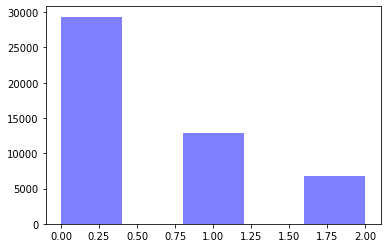

In [20]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = df_final.outage_duration
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

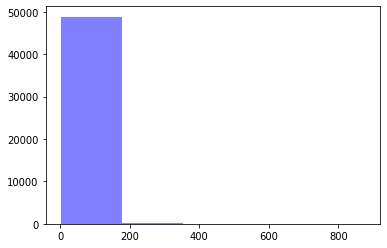

In [21]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x=df_final.volume
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [22]:
# list of numerical variables
numerical_features = [feature for feature in df_final.columns if df_final[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_final[numerical_features].head()

Number of numerical variables:  3


,id,outage_duration,volume
0,13366,1,1
1,6783,0,2
2,6783,0,2
3,6783,0,1
4,6783,0,1


In [23]:

categorical_features=[feature for feature in df_final.columns if df_final[feature].dtypes=='O']
categorical_features

['area_code',
 'broadband_type',
 'outage_type',
 'log_report_type',
 'transit_server_type']

In [24]:

df_final[categorical_features].head()

,area_code,broadband_type,outage_type,log_report_type,transit_server_type
0,area_415,broadband_type_2,outage_type_4,log_report_type_312,transit_server_type_35
1,area_474,broadband_type_2,outage_type_2,log_report_type_312,transit_server_type_35
2,area_474,broadband_type_2,outage_type_2,log_report_type_312,transit_server_type_34
3,area_474,broadband_type_2,outage_type_2,log_report_type_233,transit_server_type_35
4,area_474,broadband_type_2,outage_type_2,log_report_type_233,transit_server_type_34


In [25]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_final[feature].unique())))

The feature is area_code and number of categories are 876
The feature is broadband_type and number of categories are 10
The feature is outage_type and number of categories are 5
The feature is log_report_type and number of categories are 310
The feature is transit_server_type and number of categories are 49


In [39]:
import plotly.express as px
grouping = df_final[df_final['outage_duration']==2].groupby('area_code')['id'].count().reset_index()


fig = px.line(grouping, x='area_code', y="id", 
              title="Outage_duration counts over area where outage_duration=2(Maximum Outage duration)")

fig.show()

In [40]:
import plotly.express as px
grouping = df_final[df_final['outage_duration']==2].groupby('area_code')['id'].count().reset_index()


fig = px.bar(grouping, x='area_code', y="id", 
              title='Outage_duration counts over area where outage_duration=2(Maximum Outage duration)')

fig.show()

In [45]:
import plotly.express as px
grouping = df_final[df_final['outage_duration']==2].groupby('area_code')['id'].count().reset_index()


fig = px.scatter(grouping, x='area_code', y="id",
              title='Outage_duration counts over area where outage_duration=2(Maximum Outage duration)')

fig.show()

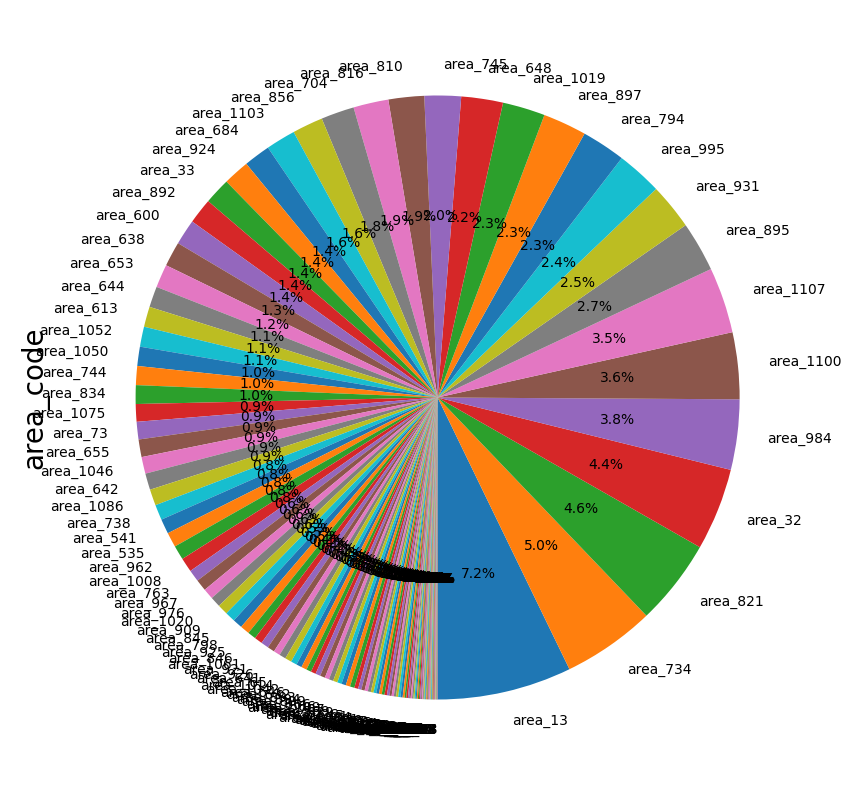

In [47]:

fig = plt.figure(figsize=(5,5), dpi=200)
ax = plt.subplot(111)

df_final[df_final['outage_duration']==2].area_code.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=5)

In [49]:
import plotly.express as px
grouping = df_final[df_final['outage_duration']==2].groupby('broadband_type')['id'].count().reset_index()


fig = px.scatter(grouping, x='broadband_type', y="id",
              title='Outage_duration counts over broadband type where outage_duration=2(Maximum Outage duration)')

fig.show()

In [50]:
import plotly.express as px
grouping = df_final[df_final['outage_duration']==2].groupby('broadband_type')['id'].count().reset_index()


fig = px.bar(grouping, x='broadband_type', y="id",
              title='Outage_duration counts over broadband type where outage_duration=2(Maximum Outage duration)')

fig.show()

In [52]:
import plotly.express as px
grouping = df_final[df_final['outage_duration']==2].groupby('broadband_type')['id'].count().reset_index()


fig = px.line(grouping, x='broadband_type', y="id",
              title='Outage_duration counts over broadband type where outage_duration=2(Maximum Outage duration)')

fig.show()

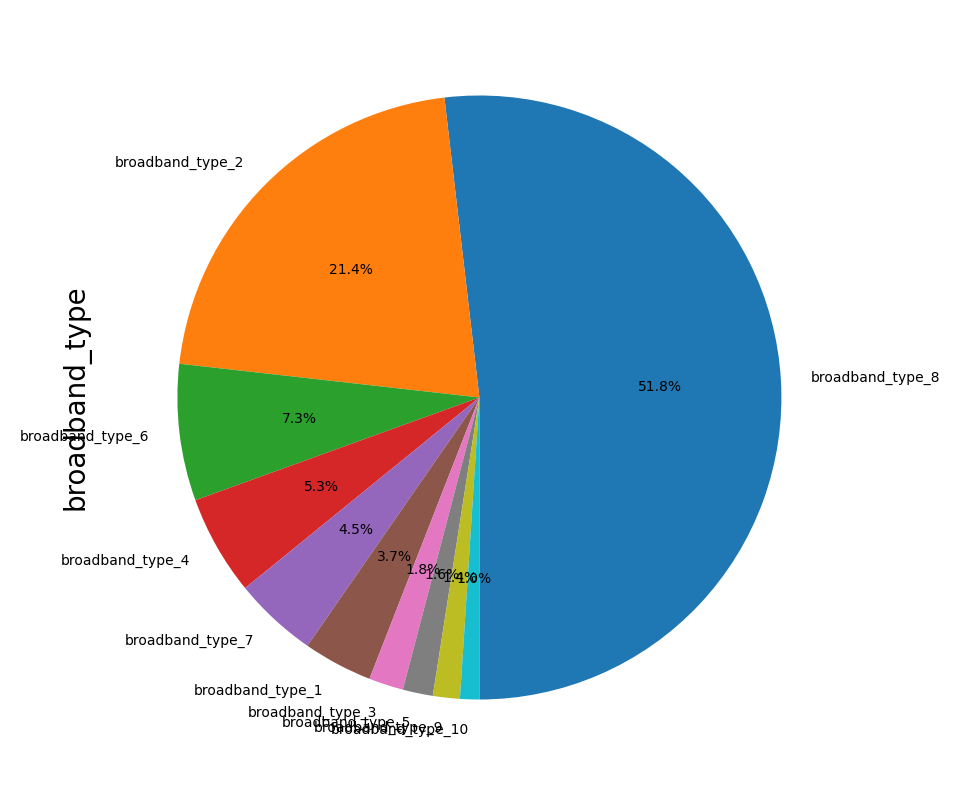

In [53]:
fig = plt.figure(figsize=(5,5), dpi=200)
ax = plt.subplot(111)

df_final[df_final['outage_duration']==2].broadband_type.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=5)